---
# Lecture notes - Random forest
---

This is the lecture note for **random forest**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to random forest. I encourage you to read further about random forests. </p>

Read more:

- [RandomForestRegressor - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [RandomForestClassifier - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Tune hyperparameters - towardsdatascience](https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d)
- [Random forest - wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [Lecture slides chapter 8 - ISLR](https://hastie.su.domains/ISLR2/Slides/Ch8_Tree_Based_Methods.pdf)
- [ISLRv2 pp. 327-352](https://www.statlearning.com/)
---


## Bagging 
- In general for independent observations $Z_1, \ldots, Z_n$ with variance $\sigma^2$ each. Mean of the observations is $\bar{Z} = \frac{\sigma^2}{n}$. So by averaging set of observation we reduce the variance.
- we do this by bagging - bootstrap aggregation. We sample multiple times from a training set and average over all the predictions.
- For classification trees we use the majority vote among all the predictions by the bootstrapped trees

## Random forest
- grow many decision trees on bootstrapped samples
- randomly choose $m \approx \sqrt{p}$ predictors/features as split candidates
- choose one of these $m$ features for the split
- new $m$ features are chosen for each split

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-white")

df = pd.read_csv("../data/heart.csv", index_col=0)
df.head()

/var/folders/q6/3g_x1fsd1gj1bssql2_z81c40000gn/T/ipykernel_20696/3805304186.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [2]:
df.info() # we have some missing values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [3]:
df.dropna(inplace=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


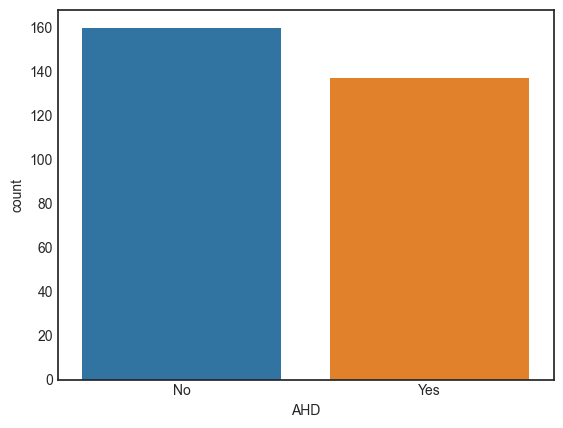

In [5]:
sns.countplot(data = df, x = 'AHD');

# yes this is pretty balanced

In [6]:
from utils import print_shapes

df = pd.get_dummies(df, drop_first=True)

X, y = df.drop("AHD_Yes", axis=1), df["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print_shapes(X_train, X_test, y_train, y_test)

X_train.shape = (237, 16)
X_test.shape = (60, 16)
y_train.shape = (237,)
y_test.shape = (60,)



## Random forest 
Notera att vi inte behöver skala datan

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred


array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=uint8)

### Hyperparameter tuning

In [8]:
from sklearn.model_selection import GridSearchCV

# testing different values of n_estimators and max_depth
# 100 mot 5 100 mot 10 100 osv
# coarse tuning
param_grid = {"n_estimators": [100, 150, 200, 300], "max_depth": [5, 10, 15, 20]}
# for more refined tuning repeat the process using parameters closer to the best parameters found in the coarse search


# verbose skriver ut saker
# för att få recall så högst som möjligt och false negative så lågt som möjligt
clf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=1,
    scoring="recall",
)

clf


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [9]:
clf.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [10]:
clf.best_params_

{'max_depth': 10, 'n_estimators': 100}

### Evaluation

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



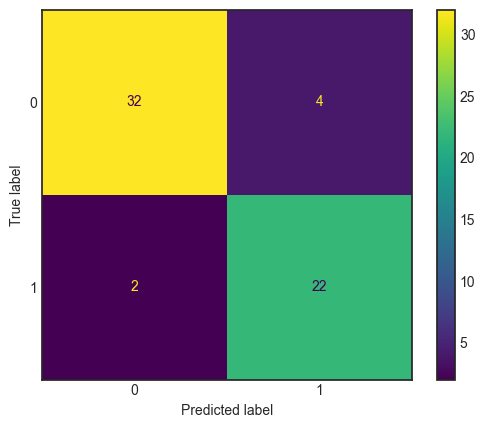

In [19]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = clf.predict(X_test)

def evaluate_classification(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

evaluate_classification(y_test, y_pred)

## Feature importance

- NOTE: to do feature importance it's better to use one-hot encoding to not lose information on the dropped column

This is left for the reader to do

In [24]:
# can pick out

model.feature_importances_

array([0.08839598, 0.03404896, 0.08362822, 0.09486928, 0.01300379,
       0.02115667, 0.12223509, 0.05525256, 0.11696637, 0.03096116,
       0.14055381, 0.03680003, 0.00910466, 0.01581684, 0.07399679,
       0.06320981])

In [28]:
# Vi får vikter på de respektiva features 
model.feature_importances_.__len__()



16

In [36]:
feature_importance = pd.DataFrame([X.columns, model.feature_importances_]).T
feature_importance.columns = ["Feature", "Importance"]
feature_importance.sort_values(by="Importance", ascending=False, inplace=True)

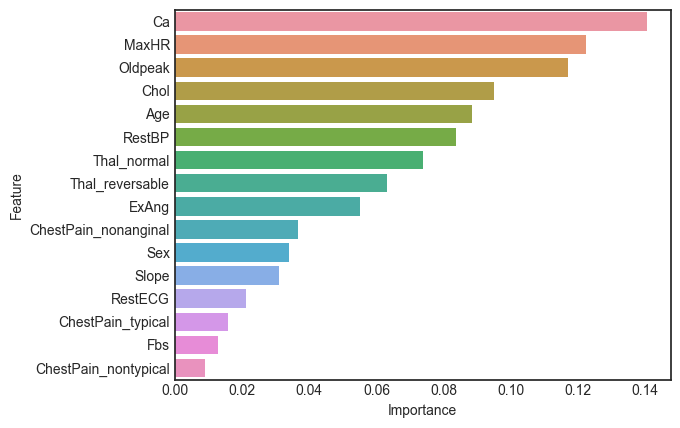

In [37]:
# Får vi vad som är viktiga featuresna är från random forest modellen
sns.barplot(data= feature_importance, x = "Importance", y = "Feature");